In [1]:
#Accretion parameter λ as a function of pbh mass and halo mass
# as per FIG. M. Riccotti et al. https://arxiv.org/pdf/0706.0864.pdf

from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from accretion import*
from Luca import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


# When β = β_Hubble
def λ_pbh_β_Hubble(z, m):
    def β_cap_pbh(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/c_s(z))**3) * (0.257)
    def x_cr_pbh(z, m):
            return (-1 + np.sqrt(1 + β_cap_pbh(z, m)))/β_cap_pbh(z, m) 
    return np.exp((9/2)/(3 + (β_cap_pbh(z, m)**(0.75)))) * (x_cr_pbh(z, m)**2)



def k(z, m):
    return  0.22 * ((1+z)/1000) * (m**(2/3)) * (((1e3 * (yr/pc))/c_s(z))**2)


def λ_halo_extended_β_Hubble(z, m):
    alpha = 2.8
    p = 3 - alpha
    power = p/(1-p)
    def β_cap(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/c_s(z))**3) * (0.257 )
    def x_cr(z, m):
        return  ((-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m)) 
    def β_cap_halo(z, m):
        return (k(z, m)**power) * β_cap(z, m)
    def x_cr_halo(z, m):
        return ((k(z, m)/2)**power) * ((-1 + np.sqrt(1 + β_cap_halo(z, m)))/β_cap_halo(z, m)) 
    def gamma_bar(z, m):
        return ((1 + 10 * β_cap_halo(z, m))**(1/10)) * np.exp(2 - k(z, m)) * ((k(z, m)/2)**2)
    return  (gamma_bar(z, m)**power) *  np.exp((9/2)/(3 + (β_cap(z, m)**(0.75)))) * (x_cr(z, m)**2)




def λ_halo_pointmass_β_Hubble(z, m):
    def β_cap_halo_pointmass(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/c_s(z))**3) * (0.257 )
    def x_cr_halo_pointmass(z, m):
        return  ((-1 + np.sqrt(1 + β_cap_halo_pointmass(z, m)))/β_cap_halo_pointmass(z, m)) 
    return np.exp((9/2)/(3 + (β_cap_halo_pointmass(z, m)**(0.75)))) * (x_cr_halo_pointmass(z, m)**2)


/tmp/ipykernel_19741/2699591776.py:32: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(m_arr), np.log10(λ_halo1_arr), 'C2', ls = '-.')


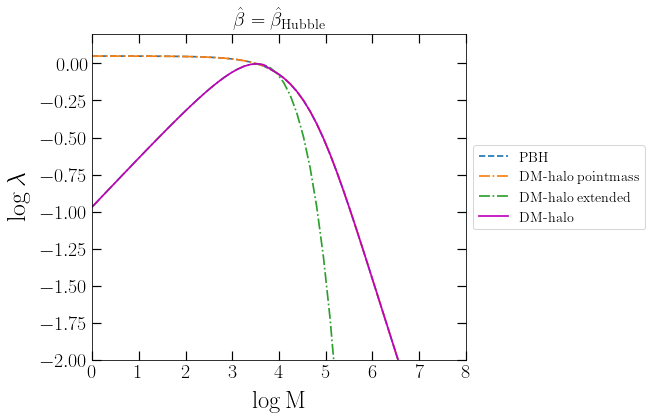

In [2]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



m_arr = np.geomspace(1, 1e14, 100)
m_halo_arr = np.zeros(len(m_arr))
λ_halo_arr = np.zeros(len(m_arr))
λ_halo1_arr = np.zeros(len(m_arr))
λ_halo2_arr = np.zeros(len(m_arr))
λ_pbh_arr = np.zeros(len(m_arr))

z = 1000 -1 

    
for i, m in enumerate(m_arr):
    λ_pbh_arr[i] = λ_pbh_β_Hubble(z, m)
    λ_halo_arr[i] = λ_halo_pointmass_β_Hubble(z, m)
    λ_halo1_arr[i] = λ_halo_extended_β_Hubble(z, m)
    if k(z, m) < 2:
        λ_halo2_arr[i] = λ_halo_extended_β_Hubble(z, m)
    else:
        λ_halo2_arr[i] = λ_pbh_β_Hubble(z, m)
        
    
plt.plot(np.log10(m_arr), np.log10(λ_pbh_arr),  'C0', ls = '--')
plt.plot(np.log10(m_arr), np.log10(λ_halo_arr), 'C1', ls = '-.')
plt.plot(np.log10(m_arr), np.log10(λ_halo1_arr), 'C2', ls = '-.')
plt.plot(np.log10(m_arr), np.log10(λ_halo2_arr), 'm')



plt.xlim(0, 8)
plt.ylim(-2, 0.2)
plt.xlabel('$\mathrm{log} \,\mathrm{M} $',  fontsize = 24.5, labelpad = 10)
plt.ylabel(' $\mathrm{log}\, \lambda$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'$\hat \beta  = \hat \beta_\mathrm{Hubble}$', fontsize = 20, pad = 8)
plt.legend( ['PBH' ,  'DM-halo pointmass', 'DM-halo extended', 'DM-halo'],
           title_fontsize = 12, loc = (1.02, 0.4), prop = {"size":14.3})
plt.savefig('λ_Hubble.pdf', bbox_inches = 'tight')
plt.show()

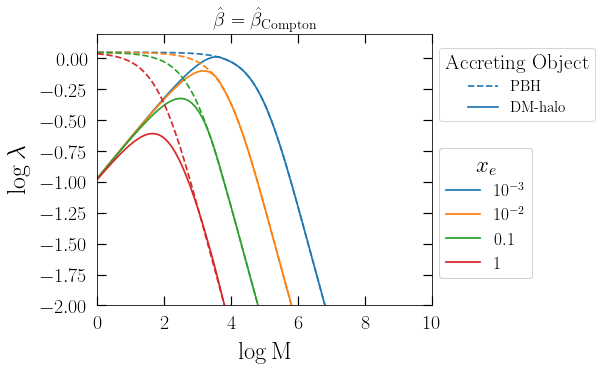

In [3]:
# When β = β_Compton

def λ_pbh_β_Compton(z, m):
    def β_cap_pbh(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/c_s(z))**3) * (1.45 * (x_e/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr_pbh(z, m):
            return (-1 + np.sqrt(1 + β_cap_pbh(z, m)))/β_cap_pbh(z, m) 
    return np.exp((9/2)/(3 + (β_cap_pbh(z, m)**(0.75)))) * (x_cr_pbh(z, m)**2)



def λ_halo_extended_β_Compton(z, m):
    alpha = 2.8
    p = 3 - alpha
    power = p/(1-p)
    def β_cap(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/c_s(z))**3) * (1.45 * (x_e/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr(z, m):
        return  ((-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m)) 
    def β_cap_halo(z, m):
        return (k(z, m)**power) * β_cap(z, m)
    def x_cr_halo(z, m):
        return  ((-1 + np.sqrt(1 + β_cap_halo(z, m)))/β_cap_halo(z, m)) 
    def gamma_bar(z, m):
        return ((1 + 10 * β_cap_halo(z, m))**(1/10)) * np.exp(2 - k(z, m)) * ((k(z, m)/2)**2)
    return (gamma_bar(z, m)**power) *  np.exp((9/2)/(3 + (β_cap(z, m)**(0.75)))) * (x_cr_halo(z, m)**2)




def λ_halo_pointmass_β_Compton(z, m):
    def β_cap_halo_pointmass(z, m):
        return 1e-4 *  m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/c_s(z))**3) * (1.45 * (x_e/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr_halo_pointmass(z, m):
        return  ((-1 + np.sqrt(1 + β_cap_halo_pointmass(z, m)))/β_cap_halo_pointmass(z, m)) 
    return np.exp((9/2)/(3 + (β_cap_halo_pointmass(z, m)**(0.75)))) * (x_cr_halo_pointmass(z, m)**2)



colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig, ax = plt.subplots(1, figsize = (6, 5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


 #in units of M_solar
z = 1000 -1
x_e_arr = np.array([1e-3, 1e-2, 0.1, 1])
m_arr = np.geomspace(1, 1e10, 100)
m_halo_arr = np.zeros(len(m_arr))
λ_halo_arr = np.zeros(len(m_arr))
λ_pbh_arr = np.zeros(len(m_arr))
colors = ['C0', 'C1', 'C2', 'C3']




    
for i, (x_e, color) in enumerate(zip(x_e_arr, colors)):
    for j, m in enumerate(m_arr):
        λ_pbh_arr[j] = λ_pbh_β_Compton(z, m)
        if k(z, m)<2:
            λ_halo_arr[j]= λ_halo_extended_β_Compton(z, m)
        else:
            λ_halo_arr[j] = λ_halo_pointmass_β_Compton(z, m)
        

    plt.plot(np.log10(m_arr), np.log10(λ_pbh_arr), color = color,  ls = '--')
    plt.plot(np.log10(m_arr), np.log10(λ_halo_arr), color = color)


    
    
    
ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["PBH", "DM-halo"], title = 'Accreting Object',
        title_fontsize = 21, loc = (1.02, 0.68), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [1,3,5,7]], [ '$10^{-3}$' ,  '$10^{-2}$', '$0.1$', '$1$'], title = '$x_{e}$',
           title_fontsize = 23, loc = (1.02, 0.1), prop = {"size":17.3})

ax.add_artist(legend1)
ax.add_artist(legend2)
    
    
plt.xlim(0, 10)
plt.ylim(-2, 0.2)
plt.xlabel('$\mathrm{log} \,\mathrm{M} $',  fontsize = 24.5, labelpad = 10)
plt.ylabel(' $\mathrm{log}\, \lambda$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'$\hat \beta  = \hat \beta_\mathrm{Compton}$', fontsize = 20, pad = 8)
plt.savefig('λ_Compton.pdf', bbox_inches = 'tight')
plt.show()

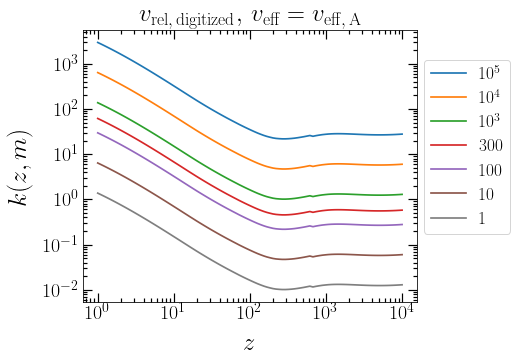

In [4]:
def k(z, m):
    return 0.22 * ((1+z)/1000) * (m + M_halo(z, m)) * ((M_halo(z, m))**(-1/3)) * (((1e3 * (yr/pc))/v_eff(z))**2)


colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig, ax = plt.subplots(1, figsize = (6, 5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7']
k_arr = np.zeros(len(z_arr))

e_fraction = 1e-3
for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        k_arr[j] = k(z, m)
    ax.loglog(z_arr,k_arr, color = color)
    



    
plt.xlabel('$z$',  fontsize = 24.5, labelpad = 10)
plt.ylabel('$k(z, m)$', fontsize = 26, labelpad = 10)
plt.legend([ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
           title_fontsize = 12, loc = (1.02, 0.25), prop = {"size":17.3})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.title(' $\,v_\mathrm{rel,\, digitized},\, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('k.pdf', bbox_inches = 'tight')
plt.show()   